<a href="https://colab.research.google.com/github/Sanjanagc25/bottom-up-attention/blob/master/pythia_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First download all of the necessary data

---

Press "Shift + Enter" to run each cell sequentially. Alternatively, you can press "Cmd/Ctrl + F9" to run all cells and then scroll down to bottom cell.

In [1]:
# Download Pre-requisites needed for running the e2e model
%cd /content/

%mkdir model_data
!wget -O /content/model_data/answers_vqa.txt https://dl.fbaipublicfiles.com/pythia/data/answers_vqa.txt
!wget -O /content/model_data/vocabulary_100k.txt https://dl.fbaipublicfiles.com/pythia/data/vocabulary_100k.txt
!wget -O /content/model_data/detectron_model.pth  https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model.pth 
!wget -O /content/model_data/pythia.pth https://dl.fbaipublicfiles.com/pythia/pretrained_models/vqa2/pythia_train_val.pth
!wget -O /content/model_data/pythia.yaml https://dl.fbaipublicfiles.com/pythia/pretrained_models/vqa2/pythia_train_val.yml
!wget -O /content/model_data/detectron_model.yaml https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model.yaml
!wget -O /content/model_data/detectron_weights.tar.gz https://dl.fbaipublicfiles.com/pythia/data/detectron_weights.tar.gz
!tar xf /content/model_data/detectron_weights.tar.gz

/content
--2019-11-12 18:50:25--  https://dl.fbaipublicfiles.com/pythia/data/answers_vqa.txt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24768 (24K) [text/plain]
Saving to: ‘/content/model_data/answers_vqa.txt’

/content/model_data 100%[===================>]  24.19K   142KB/s    in 0.2s    

2019-11-12 18:50:26 (142 KB/s) - ‘/content/model_data/answers_vqa.txt’ saved [24768/24768]

--2019-11-12 18:50:27--  https://dl.fbaipublicfiles.com/pythia/data/vocabulary_100k.txt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 626738 (612K) [text/plain]
Saving to:

## Now, install some particular dependencies

In [2]:
# Install dependencies
!pip install ninja yacs cython matplotlib demjson
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

     |████████████████████████████████| 102kB 4.3MB/s 
     |████████████████████████████████| 133kB 38.9MB/s 
  Created wheel for demjson: filename=demjson-2.2.4-cp36-none-any.whl size=73546 sha256=cffa0d4ff989816f7b2002d3795427f753bcba02c3c105218c5cd5f9a8dd4cd1
  Stored in directory: /root/.cache/pip/wheels/c5/d2/ab/a54fb5ea53ac3badba098160e8452fa126a51febda80440ded
Successfully built demjson
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-6n0h5m8b
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-6n0h5m8b
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275261 sha256=91e30eb45409fa85ed73eb24cead472f7f63564a3f1a7d6cb7a8ff300a3a482c
  Stored in directory: /tmp/pip-ephem-wheel-cache-sni21kzu/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools


## Install fastText for installing Pythia

In [3]:
%cd /content/
%rm -rf fastText
!git clone https://github.com/facebookresearch/fastText.git fastText
%cd /content/fastText
!pip install -e .

/content
Cloning into 'fastText'...
remote: Enumerating objects: 3531, done.
remote: Total 3531 (delta 0), reused 0 (delta 0), pack-reused 3531
Receiving objects: 100% (3531/3531), 8.01 MiB | 9.70 MiB/s, done.
Resolving deltas: 100% (2224/2224), done.
/content/fastText
Obtaining file:///content/fastText
  Running setup.py develop for fasttext


## Install Pythia now

In [1]:
%cd /content/
%rm -rf pythia
!git clone https://github.com/facebookresearch/pythia.git pythia
%cd /content/pythia
# Don't modify torch version
!sed -i '/torch/d' requirements.txt
!pip install -e .
import sys
sys.path.append('/content/pythia')

/content
Cloning into 'pythia'...
remote: Enumerating objects: 3653, done.
remote: Total 3653 (delta 0), reused 0 (delta 0), pack-reused 3653
Receiving objects: 100% (3653/3653), 6.59 MiB | 6.04 MiB/s, done.
Resolving deltas: 100% (2378/2378), done.
/content/pythia
Obtaining file:///content/pythia
  Found existing installation: pythia 0.3
    Can't uninstall 'pythia'. No files were found to uninstall.
  Running setup.py develop for pythia


## Install maskrcnn-benchmark now

In [2]:
# Install maskrcnn-benchmark to extract detectron features
%cd /content
!git clone https://gitlab.com/meetshah1995/vqa-maskrcnn-benchmark.git
%cd /content/vqa-maskrcnn-benchmark
# Compile custom layers and build mask-rcnn backbone
!python setup.py build
!python setup.py develop
sys.path.append('/content/vqa-maskrcnn-benchmark')

/content
Cloning into 'vqa-maskrcnn-benchmark'...
remote: Enumerating objects: 730, done.
remote: Counting objects: 100% (730/730), done.
remote: Compressing objects: 100% (337/337), done.
remote: Total 730 (delta 402), reused 701 (delta 386)
Receiving objects: 100% (730/730), 3.76 MiB | 5.61 MiB/s, done.
Resolving deltas: 100% (402/402), done.
/content/vqa-maskrcnn-benchmark
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.6
creating build/lib.linux-x86_64-3.6/maskrcnn_benchmark
copying maskrcnn_benchmark/__init__.py -> build/lib.linux-x86_64-3.6/maskrcnn_benchmark
creating build/lib.linux-x86_64-3.6/maskrcnn_benchmark/engine
copying maskrcnn_benchmark/engine/inference.py -> build/lib.linux-x86_64-3.6/maskrcnn_benchmark/engine
copying maskrcnn_benchmark/engine/trainer.py -> build/lib.linux-x86_64-3.6/maskrcnn_benchmark/engine
copying maskrcnn_benchmark/engine/__init__.py -> build/lib.linux-x86_64-3.6/maskrcnn_benchmark/engine
creating build/lib.linux-x86

## Demo

The class handles everything from feature extraction, token extraction and predicting the answer

In [3]:
%cd /content/
import yaml
import cv2
import torch
import requests
import numpy as np
import gc
import torch.nn.functional as F
import pandas as pd


import torchvision.models as models
import torchvision.transforms as transforms

from PIL import Image
from IPython.display import display, HTML, clear_output
from ipywidgets import widgets, Layout
from io import BytesIO


from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.layers import nms
from maskrcnn_benchmark.modeling.detector import build_detection_model
from maskrcnn_benchmark.structures.image_list import to_image_list
from maskrcnn_benchmark.utils.model_serialization import load_state_dict


from pythia.utils.configuration import ConfigNode
from pythia.tasks.processors import VocabProcessor, VQAAnswerProcessor
from pythia.models.pythia import Pythia
from pythia.common.registry import registry
from pythia.common.sample import Sample, SampleList


class PythiaDemo:
  TARGET_IMAGE_SIZE = [448, 448]
  CHANNEL_MEAN = [0.485, 0.456, 0.406]
  CHANNEL_STD = [0.229, 0.224, 0.225]
  
  def __init__(self):
    self._init_processors()
    self.pythia_model = self._build_pythia_model()
    self.detection_model = self._build_detection_model()
    self.resnet_model = self._build_resnet_model()
    
  def _init_processors(self):
    with open("/content/model_data/pythia.yaml") as f:
      config = yaml.load(f)
    
    config = ConfigNode(config)
    # Remove warning
    config.training_parameters.evalai_inference = True
    registry.register("config", config)
    
    self.config = config
    
    vqa_config = config.task_attributes.vqa.dataset_attributes.vqa2
    text_processor_config = vqa_config.processors.text_processor
    answer_processor_config = vqa_config.processors.answer_processor
    
    text_processor_config.params.vocab.vocab_file = "/content/model_data/vocabulary_100k.txt"
    answer_processor_config.params.vocab_file = "/content/model_data/answers_vqa.txt"
    # Add preprocessor as that will needed when we are getting questions from user
    self.text_processor = VocabProcessor(text_processor_config.params)
    self.answer_processor = VQAAnswerProcessor(answer_processor_config.params)

    registry.register("vqa2_text_processor", self.text_processor)
    registry.register("vqa2_answer_processor", self.answer_processor)
    registry.register("vqa2_num_final_outputs", 
                      self.answer_processor.get_vocab_size())
    
  def _build_pythia_model(self):
    state_dict = torch.load('/content/model_data/pythia.pth')
    model_config = self.config.model_attributes.pythia
    model_config.model_data_dir = "/content/"
    model = Pythia(model_config)
    model.build()
    model.init_losses_and_metrics()
    
    if list(state_dict.keys())[0].startswith('module') and \
       not hasattr(model, 'module'):
      state_dict = self._multi_gpu_state_to_single(state_dict)
          
    model.load_state_dict(state_dict)
    model.to("cuda")
    model.eval()
    
    return model
  
  def _build_resnet_model(self):
    self.data_transforms = transforms.Compose([
        transforms.Resize(self.TARGET_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(self.CHANNEL_MEAN, self.CHANNEL_STD),
    ])
    resnet152 = models.resnet152(pretrained=True)
    resnet152.eval()
    modules = list(resnet152.children())[:-2]
    self.resnet152_model = torch.nn.Sequential(*modules)
    self.resnet152_model.to("cuda")
  
  def _multi_gpu_state_to_single(self, state_dict):
    new_sd = {}
    for k, v in state_dict.items():
        if not k.startswith('module.'):
            raise TypeError("Not a multiple GPU state of dict")
        k1 = k[7:]
        new_sd[k1] = v
    return new_sd
  
  def predict(self, url, question):
    with torch.no_grad():
      detectron_features = self.get_detectron_features(url)
      resnet_features = self.get_resnet_features(url)

      sample = Sample()

      processed_text = self.text_processor({"text": question})
      sample.text = processed_text["text"]
      sample.text_len = len(processed_text["tokens"])

      sample.image_feature_0 = detectron_features
      sample.image_info_0 = Sample({
          "max_features": torch.tensor(100, dtype=torch.long)
      })

      sample.image_feature_1 = resnet_features

      sample_list = SampleList([sample])
      sample_list = sample_list.to("cuda")

      scores = self.pythia_model(sample_list)["scores"]
      scores = torch.nn.functional.softmax(scores, dim=1)
      actual, indices = scores.topk(5, dim=1)

      top_indices = indices[0]
      top_scores = actual[0]

      probs = []
      answers = []

      for idx, score in enumerate(top_scores):
        probs.append(score.item())
        answers.append(
            self.answer_processor.idx2word(top_indices[idx].item())
        )
    
    gc.collect()
    torch.cuda.empty_cache()
    
    return probs, answers
    
  
  def _build_detection_model(self):

      cfg.merge_from_file('/content/model_data/detectron_model.yaml')
      cfg.freeze()

      model = build_detection_model(cfg)
      checkpoint = torch.load('/content/model_data/detectron_model.pth', 
                              map_location=torch.device("cpu"))

      load_state_dict(model, checkpoint.pop("model"))

      model.to("cuda")
      model.eval()
      return model
  
  def get_actual_image(self, image_path):
      if image_path.startswith('http'):
          path = requests.get(image_path, stream=True).raw
      else:
          path = image_path
      
      return path

  def _image_transform(self, image_path):
      path = self.get_actual_image(image_path)

      img = Image.open(path)
      im = np.array(img).astype(np.float32)
      im = im[:, :, ::-1]
      im -= np.array([102.9801, 115.9465, 122.7717])
      im_shape = im.shape
      im_size_min = np.min(im_shape[0:2])
      im_size_max = np.max(im_shape[0:2])
      im_scale = float(800) / float(im_size_min)
      # Prevent the biggest axis from being more than max_size
      if np.round(im_scale * im_size_max) > 1333:
           im_scale = float(1333) / float(im_size_max)
      im = cv2.resize(
           im,
           None,
           None,
           fx=im_scale,
           fy=im_scale,
           interpolation=cv2.INTER_LINEAR
       )
      img = torch.from_numpy(im).permute(2, 0, 1)
      return img, im_scale


  def _process_feature_extraction(self, output,
                                 im_scales,
                                 feat_name='fc6',
                                 conf_thresh=0.2):
      batch_size = len(output[0]["proposals"])
      n_boxes_per_image = [len(_) for _ in output[0]["proposals"]]
      score_list = output[0]["scores"].split(n_boxes_per_image)
      score_list = [torch.nn.functional.softmax(x, -1) for x in score_list]
      feats = output[0][feat_name].split(n_boxes_per_image)
      cur_device = score_list[0].device

      feat_list = []

      for i in range(batch_size):
          dets = output[0]["proposals"][i].bbox / im_scales[i]
          scores = score_list[i]

          max_conf = torch.zeros((scores.shape[0])).to(cur_device)

          for cls_ind in range(1, scores.shape[1]):
              cls_scores = scores[:, cls_ind]
              keep = nms(dets, cls_scores, 0.5)
              max_conf[keep] = torch.where(cls_scores[keep] > max_conf[keep],
                                           cls_scores[keep],
                                           max_conf[keep])

          keep_boxes = torch.argsort(max_conf, descending=True)[:100]
          feat_list.append(feats[i][keep_boxes])
      return feat_list

  def masked_unk_softmax(self, x, dim, mask_idx):
      x1 = F.softmax(x, dim=dim)
      x1[:, mask_idx] = 0
      x1_sum = torch.sum(x1, dim=1, keepdim=True)
      y = x1 / x1_sum
      return y
   
  def get_resnet_features(self, image_path):
      path = self.get_actual_image(image_path)
      img = Image.open(path).convert("RGB")
      img_transform = self.data_transforms(img)
      
      if img_transform.shape[0] == 1:
        img_transform = img_transform.expand(3, -1, -1)
      img_transform = img_transform.unsqueeze(0).to("cuda")
      
      features = self.resnet152_model(img_transform).permute(0, 2, 3, 1)
      features = features.view(196, 2048)
      return features
    
  def get_detectron_features(self, image_path):
      im, im_scale = self._image_transform(image_path)
      img_tensor, im_scales = [im], [im_scale]
      current_img_list = to_image_list(img_tensor, size_divisible=32)
      current_img_list = current_img_list.to('cuda')
      with torch.no_grad():
          output = self.detection_model(current_img_list)
      feat_list = self._process_feature_extraction(output, im_scales, 
                                                  'fc6', 0.2)
      return feat_list[0]
    

/content


### If the command below fails with 'CUDNN_EXECUTION_FAILED', try rerunning the cell

In [4]:
demo = PythiaDemo()

/content/pythia/pythia/.vector_cache/glove.6B.zip: 862MB [06:31, 2.20MB/s]                           
100%|█████████▉| 399951/400000 [01:00<00:00, 6665.74it/s]Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth

  0%|          | 0.00/230M [00:00<?, ?B/s]
  0%|          | 56.0k/230M [00:00<10:44, 375kB/s]
  0%|          | 256k/230M [00:00<08:25, 477kB/s] 
  0%|          | 1.09M/230M [00:00<06:03, 662kB/s]
  1%|          | 2.25M/230M [00:00<04:19, 922kB/s]
  3%|▎         | 7.69M/230M [00:00<02:58, 1.31MB/s]
  6%|▌         | 13.8M/230M [00:00<02:02, 1.85MB/s]
  8%|▊         | 19.0M/230M [00:00<01:25, 2.61MB/s]
 11%|█         | 25.2M/230M [00:00<00:58, 3.66MB/s]
 15%|█▍        | 33.5M/230M [00:01<00:40, 5.14MB/s]
 17%|█▋        | 39.1M/230M [00:01<00:28, 7.03MB/s]
 19%|█▉        | 44.8M/230M [00:01<00:20, 9.52MB/s]
 22%|██▏       | 51.5M/230M [00:01<00:14, 12.8MB/s]
 25%|██▌       | 57.9M/230M [00:01<00:10, 16.9

## Use the text fields below to ask a question on an image

Image URL can be any http/https URL. We show top 5 predictions from Pythia. Confidence shows how confident Pythia model was about a particular prediction.

Text(value='http://farm4.staticflickr.com/3509/3262383418_7e590d3f7c_z.jpg', description='Image URL')

Text(value='where is this place?', description='Question')

Button(description='Ask Pythia!', style=ButtonStyle())

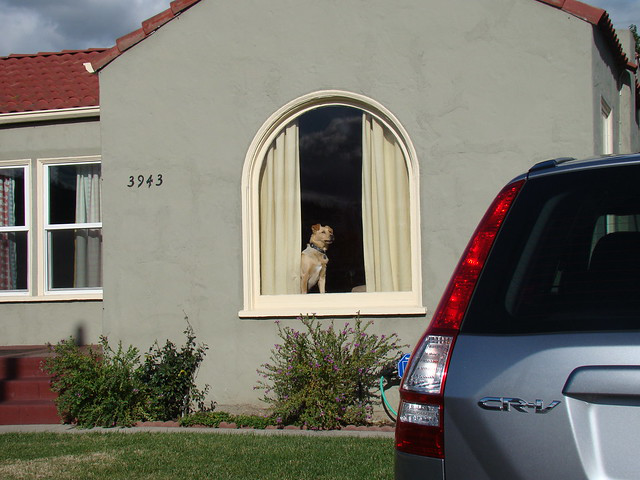

,Prediction,Confidence
0,outside,26.205474
1,city,20.176600
2,house,17.628945
3,town,9.524307
4,street,6.355608


In [0]:
def init_widgets(url, question):
  image_text = widgets.Text(
    description="Image URL", layout=Layout(minwidth="70%")
  )
  question_text = widgets.Text(
      description="Question", layout=Layout(minwidth="70%")
  )

  image_text.value = url
  question_text.value = question
  submit_button = widgets.Button(description="Ask Pythia!")

  display(image_text)
  display(question_text)
  display(submit_button)

  submit_button.on_click(lambda b: on_button_click(
      b, image_text, question_text
  ))
  
  return image_text, question_text
  
def on_button_click(b, image_text, question_text):
  clear_output()
  image_path = demo.get_actual_image(image_text.value)
  image = Image.open(image_path)
  
  scores, predictions = demo.predict(image_text.value, question_text.value)
  scores = [score * 100 for score in scores]
  df = pd.DataFrame({
      "Prediction": predictions,
      "Confidence": scores
  })
  
  init_widgets(image_text.value, question_text.value)
  display(image)
  
  display(HTML(df.to_html()))
 

image_text, question_text = init_widgets(
    "http://farm4.staticflickr.com/3509/3262383418_7e590d3f7c_z.jpg", 
    "where is this place?"
)
